# **HDF5 Builder Python Function**

#### Amil Khan, Marie Charpagne, Marat Latypov
***

In [12]:
import h5py 
import imghdr
import numpy as np
import matplotlib.pyplot as plt

## Instructions

This function is built as a preprocessing step for the __Distortion Correction__ function soon to be implemented into BisQue.

#### **Inputs**

- Path to `ang` file
- Path to EBSD image
- Path to segmented image
- Name for the Output HDF file


#### **Outputs**

- HDF file containing all three components for __Distortion Correction__ function in BisQue.

In [19]:
def HDF_Creator(ang_path, ebsd_path, segment_path, output_filename):

    
    if isinstance(ebsd_path, np.ndarray) and isinstance(segment_path, np.ndarray):
        print("Loading images from numpy arrays...")
        ebsd = ebsd_path
        segment = segment_path

    elif (imghdr.what(ebsd_path) and imghdr.what(segment_path)) in ['png', 'jpg', 'tif']:
        print("Loading images from file paths...")
        ebsd = plt.imread(ebsd_path)
        segment = plt.imread(segment_path)

    else:
        print("Brew, are you inputting valid images?")
    
    ang = np.loadtxt(ang_path)
    
    print('\n------------------------------------------')
    print('EBSD Image Shape      :', ebsd.shape)
    print('Segmented Image Shape :', segment.shape)
    print('.ang Shape            :', ang.shape)
    print('------------------------------------------\n')
    
    fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
    axes[0].imshow(ebsd, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title("EBSD")
    axes[1].imshow(segment, cmap='gray')
    axes[1].set_title("Segmented")
    axes[1].axis('off')
    plt.suptitle("Inputted Images")

     
    f = h5py.File(output_filename, 'a')
    f.create_dataset("ebsd", data=ebsd)
    f.create_dataset("segment", data=segment)
    f.create_dataset("ang", data=ang)
    
    
    print('Output Filename      :', output_filename)
    print("Keys from output HDF5:",list(f.keys()), "\n")
    return f

### **Comments**

As you can see in the output, I have included some meta-data about the inputs to help you verify your inputs. For instance, if you inputted `numpy` arrays, the beginning of the function call will tell you. Additionally, the shapes of the images and `.ang` file is outputted. And if you were questioning which images you loaded, there is a side-by-side of the inputted images.

Loading images from file paths...

------------------------------------------
EBSD Image Shape      : (846, 601)
Segmented Image Shape : (1893, 1153, 3)
.ang Shape            : (508446, 14)
------------------------------------------

Output Filename      : test_condition.h5
Keys from output HDF5: ['ang', 'ebsd', 'segment'] 



<HDF5 file "test_condition.h5" (mode r+)>

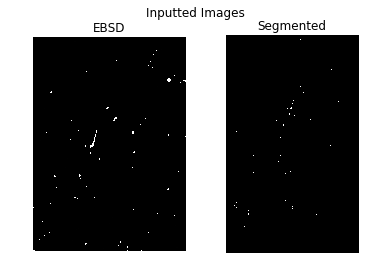

In [21]:
HDF_Creator('AM718/ang/AM718.ang','AM718/ebsd/AM718_ebsd.jpg','AM718/segment/AM718_segment.png', 'test_condition.h5')